In [1]:

from google.colab import files
uploaded = files.upload()





Saving StudentsPerformance.csv to StudentsPerformance.csv


In [19]:
import numpy as np
# ==== Manual Dataset ====

import pandas as pd

# Read CSV
data = pd.read_csv("StudentsPerformance.csv")
data=data.drop('race/ethnicity', axis=1)
data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


cols_to_encode = ['gender', 'parental level of education', 'lunch', 'test preparation course']

# Apply LabelEncoder to each
label_encoders = {}

for col in cols_to_encode:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoder for later inverse_transform if needed


data.head(3)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,72,72,74
1,0,4,1,0,69,90,88
2,0,3,1,1,90,95,93


In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume data is already loaded and label-encoded as you've shown
# Columns: gender, parental level of education, lunch, test preparation course,
#          math score, reading score, writing score

# === Step 1: Separate features and target
X = data.drop(columns=["math score"]).copy()
y = data["math score"].values.reshape(-1, 1)

# === Step 2: Scale only the numeric columns in X (reading & writing scores)
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

# === Step 3: Scale the target variable y
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

X

array([[-0.96462528, -0.81264039,  0.74188112,  0.74674788,  0.19399858,
         0.39149181],
       [-0.96462528,  0.82795259,  0.74188112, -1.33914006,  1.42747598,
         1.31326868],
       [-0.96462528,  0.28108826,  0.74188112,  0.74674788,  1.77010859,
         1.64247471],
       ...,
       [-0.96462528, -0.26577606, -1.34792485, -1.33914006,  0.12547206,
        -0.20107904],
       [-0.96462528,  0.82795259,  0.74188112, -1.33914006,  0.60515772,
         0.58901542],
       [-0.96462528,  0.82795259, -1.34792485,  0.74674788,  1.15336989,
         1.18158627]])

In [43]:
# Split features and labels
# Define features and label


input_size = 6
hidden_size_1 = 64
hidden_size_2 = 32
output_size = 1
learning_rate = 0.001
epochs = 2000


# Initialize weights (use better initialization like He initialization)
W1 = np.random.randn(input_size, hidden_size_1) * np.sqrt(2./input_size)
b1 = np.zeros((1, hidden_size_1))
W2 = np.random.randn(hidden_size_1, hidden_size_2) * np.sqrt(2./hidden_size_1)
b2 = np.zeros((1, hidden_size_2))
W3 = np.random.randn(hidden_size_2, output_size) * np.sqrt(2./hidden_size_2)
b3 = np.zeros((1, output_size))


#W1 is a (6*64) matrix of all 1s — this means each neuron's output in the hidden layer is just the sum of input columns...
#W3 is a (32*1) matrix of all 1s — the output layer just sums all 4 hidden neuron outputs.





In [50]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)   #activation function to be understood once again

losses = []

for epoch in range(epochs):
    z1 = np.dot(X, W1) + b1   # Linear step: input → hidden     #dot product garea calculate garxa yo functuon afaile  same like (w1*X1 +W2*X2 +b)
    a1 = relu(z1)             # Apply ReLU to hidden layer  #------------------------------bzki==================

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    # OUTPUT LAYER - NO ACTIVATION (linear) for regression
    z3 = np.dot(a2, W3) + b3
    y_pred = z3  # Keep linear output

    # Linear step: hidden → output   a1 is the output from 1st layer which acts as the input for the output layer.

    # Final prediction           it showa\s that final output is itself the output from the last layer i.e. the output layer
    '''X = input features (IQ, CGPA)

W1, b1 = weights and biases for hidden layer_1

a1 = activated output of hidden layer_1

W5, b5 = weights and biases for output layer'''


    # LOSS FUNCTION MSE FOR LINEAR REGRESSION TYPE  y_pred IS PREDIUCTED SALARY

    loss = np.mean((y - y_pred) ** 2)
    losses.append(loss)

#------FINDING THE DIFFERENTIALS MANUALLY FROM SCRATCH--------------
# === Output layer ===
    dL_dy_pred = 2 * (y_pred - y) / y.shape[0]  # (batch_size, 1)        -----# Derivative of MSE    tara y.shape[0] hamro theory ma aako thena kinaki teha hamle just eauta data ko mse calculate garya thim ni ta mse of for n data is 1/n* ......  and that n is the shape of the y.shape[0]      ..................


    # Layer 3 (output)
    dL_dW3 = np.dot(a2.T, dL_dy_pred)
    dL_db3 = np.sum(dL_dy_pred, axis=0, keepdims=True)

    # Layer 2
    dL_da2 = np.dot(dL_dy_pred, W3.T)
    dL_dz2 = dL_da2 * relu_derivative(z2)
    dL_dW2 = np.dot(a1.T, dL_dz2)
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    # Layer 1
    dL_da1 = np.dot(dL_dz2, W2.T)
    dL_dz1 = dL_da1 * relu_derivative(z1)
    dL_dW1 = np.dot(X.T, dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # Update weights
    W3 -= learning_rate * dL_dW3
    b3 -= learning_rate * dL_db3
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1


# After training - final predictions
y_pred_final = scaler_y.inverse_transform(y_pred)
y_true_final = data["math score"].values  # Original unscaled values

print("\nFinal predictions vs actual (original scale 0-100):")
for pred, actual in zip(y_pred_final[:5].flatten(), y_true_final[:5]):
  print(f"Predicted: {pred:.1f} | Actual: {actual}")

#and where ius the lope that runs for all the datas i.e all the student datas i.e. each rows in the dataset inside each epochs?
# There is no explicit loop over each row/student because NumPy handles all students (rows) at once using vectorized operations.


Final predictions vs actual (original scale 0-100):
Predicted: 66.9 | Actual: 72
Predicted: 79.0 | Actual: 69
Predicted: 87.3 | Actual: 90
Predicted: 50.4 | Actual: 47
Predicted: 84.6 | Actual: 76


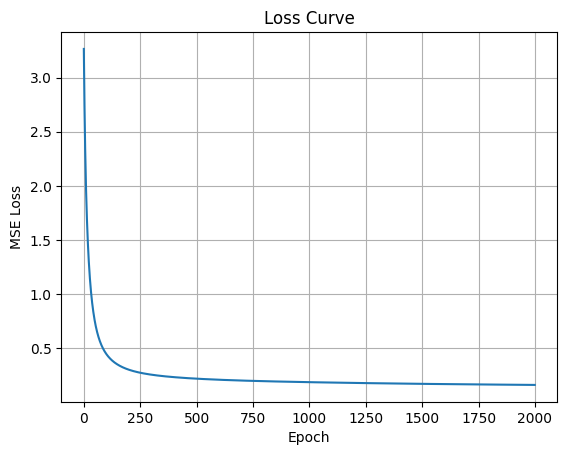

In [45]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

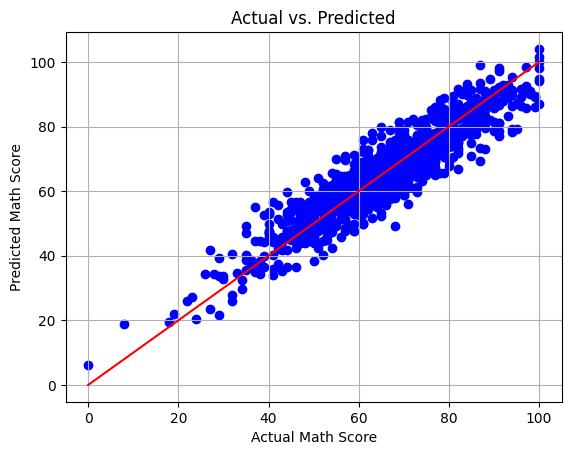

In [46]:
import matplotlib.pyplot as plt

y_pred_actual = scaler_y.inverse_transform(y_pred_final_scaled)
y_actual = scaler_y.inverse_transform(y)

plt.scatter(y_actual, y_pred_actual, c='blue')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')  # perfect prediction line
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs. Predicted")
plt.grid(True)
plt.show()

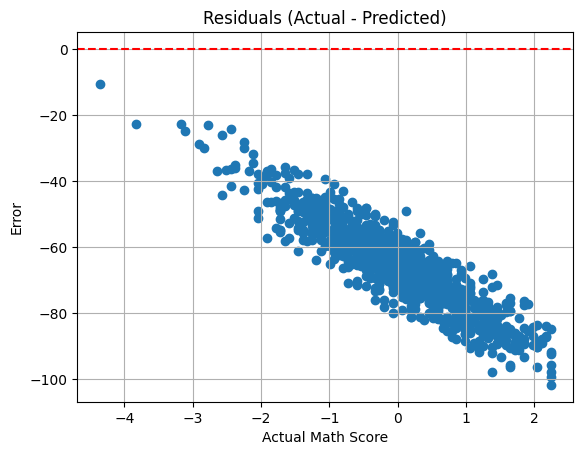

In [47]:
residuals = y.flatten() - y_pred_actual.flatten()
plt.scatter(y, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Actual Math Score")
plt.ylabel("Error")
plt.grid(True)
plt.show()
